In [47]:
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"
import pandas_profiling

In [1]:
from fastai.tabular import *

In [2]:
path = untar_data(URLs.ADULT_SAMPLE)
df = pd.read_csv(path/'adult.csv')

In [5]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k


In [45]:
df.info()  # to check missing fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32074 non-null float64
marital-status    32561 non-null object
occupation        32049 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
salary            32561 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 3.7+ MB


In [48]:
pandas_profiling.ProfileReport(df)

In [12]:
valid_idx = range(len(df)-2000, len(df))
valid_idx

range(30561, 32561)

In [8]:
dep_var = 'salary'
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
# cont_names defaults to: set(df.columns)-set(cat_names)-{dep_var}
procs = [FillMissing, Categorify, Normalize]

In [14]:
data = TabularDataBunch.from_df(path, df, dep_var = dep_var, valid_idx = valid_idx, procs = procs, cat_names = cat_names)

In [26]:
print(data.train_ds.cont_names)

['education-num', 'age', 'hours-per-week', 'capital-gain', 'fnlwgt', 'capital-loss']


In [20]:
data.train_ds.x

TabularList (30561 items)
workclass  Private; education  Assoc-acdm; marital-status  Married-civ-spouse; occupation #na#; relationship  Wife; race  White; sex  Female; native-country  United-States; education-num_na False; education-num 0.7539; age 0.7598; hours-per-week -0.0358; capital-gain -0.1459; fnlwgt -0.8371; capital-loss 4.5067; ,workclass  Private; education  Masters; marital-status  Divorced; occupation  Exec-managerial; relationship  Not-in-family; race  White; sex  Male; native-country  United-States; education-num_na False; education-num 1.5376; age 0.3937; hours-per-week 0.3682; capital-gain 1.2670; fnlwgt 0.4449; capital-loss -0.2168; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation #na#; relationship  Unmarried; race  Black; sex  Female; native-country  United-States; education-num_na True; education-num -0.0297; age -0.0457; hours-per-week -0.6821; capital-gain -0.1459; fnlwgt -0.8857; capital-loss -0.2168; ,workclass  Self-emp-inc; educat

In [21]:
data.train_ds.y

CategoryList (30561 items)
>=50k,>=50k,<50k,>=50k,<50k
Path: C:\Users\sarad\.fastai\data\adult_sample

In [22]:
data.valid_ds.x

TabularList (2000 items)
workclass  Private; education  Bachelors; marital-status  Divorced; occupation  Prof-specialty; relationship  Unmarried; race  Black; sex  Female; native-country  United-States; education-num_na False; education-num 1.1457; age 0.5401; hours-per-week -0.6821; capital-gain -0.1459; fnlwgt 1.8465; capital-loss -0.2168; ,workclass  Private; education  Some-college; marital-status  Never-married; occupation  Sales; relationship  Not-in-family; race  White; sex  Female; native-country  United-States; education-num_na False; education-num -0.0297; age -1.0709; hours-per-week -2.0556; capital-gain -0.1459; fnlwgt 1.1295; capital-loss -0.2168; ,workclass  Private; education  HS-grad; marital-status  Divorced; occupation  Machine-op-inspct; relationship  Not-in-family; race  White; sex  Female; native-country  United-States; education-num_na False; education-num -0.4216; age 0.5401; hours-per-week -0.1974; capital-gain -0.1459; fnlwgt -0.1723; capital-loss -0.2168; ,wor

In [23]:
data.valid_ds.y

CategoryList (2000 items)
<50k,<50k,<50k,>=50k,<50k
Path: C:\Users\sarad\.fastai\data\adult_sample

In [33]:
# to inspect the dataset for model training
(cat_x, cont_x), y = next(iter(data.valid_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:2]))

[[ 5 10  1 11  5  3  1 40  1]
 [ 5 16  5 13  2  5  1 40  1]]
[[ 1.145728  0.540121 -0.682123 -0.145922  1.846477 -0.216787]
 [-0.029745 -1.070876 -2.055581 -0.145922  1.129466 -0.216787]]
[0 0]


In [35]:
df.iloc[30561: 30563]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
30561,46,Private,384795,Bachelors,13.0,Divorced,Prof-specialty,Unmarried,Black,Female,0,0,32,United-States,<50k
30562,24,Private,309055,Some-college,10.0,Never-married,Sales,Not-in-family,White,Female,0,0,15,United-States,<50k


### Simple NN model

In [36]:
learn = tabular_learner(data, layers = [200, 100], metrics = accuracy)

In [37]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


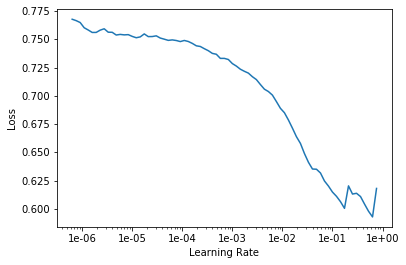

In [38]:
learn.recorder.plot()

In [39]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.321345,0.322771,0.847000,00:56


### NN Model with Embedding for all Catogorical Items

In [49]:
emb_szs = {'workclass': 9, 'education': 17, 'marital-status': 7, 'occupation': 16, 'relationship': 6, 'race': 5, 'sex': 2, 'native-country': 42}
learn = tabular_learner(data, layers = [200, 100], emb_szs = emb_szs, metrics = accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


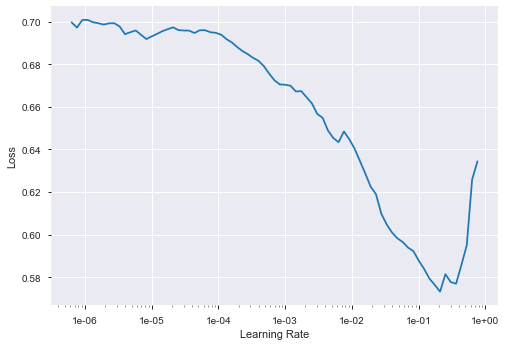

In [50]:
learn.lr_find()
learn.recorder.plot()

In [51]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.324643,0.327961,0.840500,00:56


### LIME: Local Explanation

https://blog.dominodatalab.com/shap-lime-python-libraries-part-1-great-explainers-pros-cons/

In [53]:
!pip install lime

  Stored in directory: C:\Users\sarad\AppData\Local\pip\Cache\wheels\a9\2f\25\4b2127822af5761dab9a27be52e175105772aebbcbc484fb95
  Stored in directory: C:\Users\sarad\AppData\Local\pip\Cache\wheels\de\63\64\3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built lime networkx


In [54]:
import lime
import lime.lime_tabular

In [66]:
feature_names = df[['education-num','age','hours-per-week','capital-gain','fnlwgt','capital-loss']]

lime.lime_tabular.LimeTabularExplainer(data.valid_ds, feature_names=feature_names, discretize_continuous=True)

AttributeError: shape

In [67]:
lime.lime_tabular.LimeTabularExplainer??